### rsi

In [1]:
import os
import datetime as dt
import numpy as np
import pandas as pd

# import pandas_datareader as pdr
import yfinance as yf

import matplotlib.pyplot as plt

In [2]:
ticker = "TSLA"
start = dt.datetime(2018, 1, 1)
end = dt.datetime.now()

In [3]:
# data = pdr.DataReader(ticker, 'yahoo', start, end)
data = yf.download(tickers=ticker, start=start, end=end)
data.tail(3)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-28,240.020004,247.550003,238.649994,246.380005,246.380005,117058900
2023-09-29,250.000000,254.770004,246.350006,250.220001,250.220001,128346200
2023-10-02,244.809998,251.619995,242.619995,251.639999,251.639999,53037771


In [4]:
delta = data['Adj Close'].diff(1)
delta.dropna(inplace=True)
positive = delta.copy()
negative = delta.copy()
positive[positive < 0] = 0
negative[negative > 0] = 0

In [5]:
rsi_window = 14

avg_gain = positive.rolling(window=rsi_window).mean()
avg_loss = abs(negative.rolling(window=rsi_window).mean())

relative_strength = avg_gain/avg_loss

RSI = (100.0 - 100.0/(1.0+relative_strength)
       ).to_frame().rename(columns={"Adj Close": "RSI"})

In [6]:
RSI.tail()

,RSI
Date,
2023-09-26,45.228771
2023-09-27,43.529961
2023-09-28,48.792988
2023-09-29,32.457202
2023-10-02,37.205162


In [7]:
RSI.index, data.index

(DatetimeIndex(['2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
                '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
                '2018-01-16', '2018-01-17',
                ...
                '2023-09-19', '2023-09-20', '2023-09-21', '2023-09-22',
                '2023-09-25', '2023-09-26', '2023-09-27', '2023-09-28',
                '2023-09-29', '2023-10-02'],
               dtype='datetime64[ns]', name='Date', length=1446, freq=None),
 DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
                '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
                '2018-01-12', '2018-01-16',
                ...
                '2023-09-19', '2023-09-20', '2023-09-21', '2023-09-22',
                '2023-09-25', '2023-09-26', '2023-09-27', '2023-09-28',
                '2023-09-29', '2023-10-02'],
               dtype='datetime64[ns]', name='Date', length=1447, freq=None))

In [8]:
df_combine = pd.concat(
    [data, RSI],
    # join='inner'
    axis=1
)

In [9]:
df_combine.tail()

,Open,High,Low,Close,Adj Close,Volume,RSI
Date,,,,,,,
2023-09-26,242.979996,249.550003,241.660004,244.119995,244.119995,101993600,45.228771
2023-09-27,244.259995,245.330002,234.580002,240.500000,240.500000,136597200,43.529961
2023-09-28,240.020004,247.550003,238.649994,246.380005,246.380005,117058900,48.792988
2023-09-29,250.000000,254.770004,246.350006,250.220001,250.220001,128346200,32.457202
2023-10-02,244.809998,251.619995,242.619995,251.639999,251.639999,53037771,37.205162


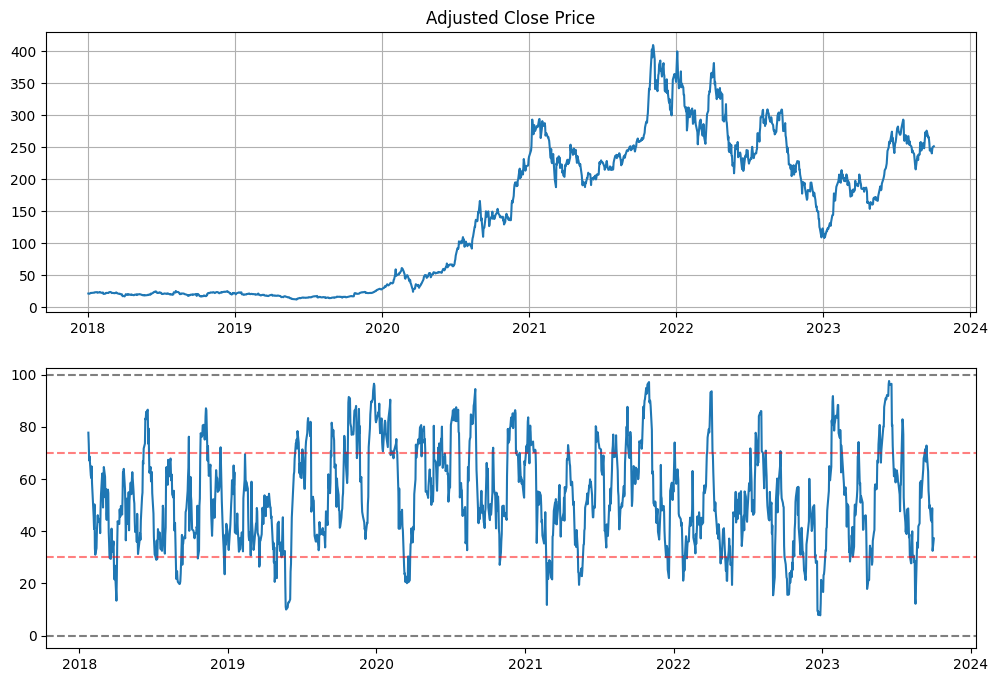

In [10]:
plt.figure(figsize=(12, 8))

ax1 = plt.subplot(211)
ax1.plot(df_combine.index, df_combine['Adj Close'])
ax1.set_title("Adjusted Close Price")
ax1.grid(True)
ax1.set_axisbelow(True)
# ax1.set_facecolor('black')


ax2 = plt.subplot(212)
ax2.plot(df_combine.index, df_combine['RSI'])
ax2.axhline(0, linestyle="--", alpha=0.5, color='black')
ax2.axhline(30, linestyle="--", alpha=0.5, color='red')
ax2.axhline(70, linestyle="--", alpha=0.5, color='red')
ax2.axhline(100, linestyle="--", alpha=0.5, color='black')
ax2.grid(False)
ax1.set_axisbelow(True)
plt.show()